# The Field of Streams

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io.fits import getdata

In [3]:
data = getdata('data/output.fits', header=False)

In [4]:
mind = data['dec'].min()  # save time later
maxd = data['dec'].max()
minr = data['ra'].min()
maxr = data['ra'].max()
bind = 2*(maxd - mind)
binr = 2*(maxr - minr)

In [5]:
b = ((data['r'] > 20.0) & (data['r'] <= 20.66))  # bin stars in terms of distance
g = ((data['r'] > 20.66) & (data['r'] <= 21.33)) # blue for close, red for far
r = ((data['r'] > 21.33) & (data['r'] <= 22.0))
ran=[[mind,maxd],[minr,maxr]]
bins=[bind,binr]

In [6]:
red, x, y = np.histogram2d(data['dec'][r],data['ra'][r],bins=bins,range=ran)   # populate bins 
green, x, y = np.histogram2d(data['dec'][g],data['ra'][g],bins=bins,range=ran) # by number of 
blue, x, y = np.histogram2d(data['dec'][b],data['ra'][b],bins=bins,range=ran)  # stars

In [7]:
rmask = np.where((red < 25.5) | (red > 82.5))     # only plot stars for given densities
gmask = np.where((green < 26.75) | (green > 76))  # 102-330(red), 107-304(green), 98-267(blue)
bmask = np.where((blue < 24.5) | (blue > 66.75))
red[rmask] = 0
green[gmask] = 0
blue[bmask] = 0

In [8]:
rgb = np.zeros((bind,binr,3),dtype='uint8')  # normalize colours
rgb[:,:,0] = red / (red.max() / 255)
rgb[:,:,1] = green / (green.max() / 255)
rgb[:,:,2] = blue / (blue.max() / 255)

In [9]:
rgb = np.flipud(rgb)  # flip image so it looks right
rgb = np.fliplr(rgb)
extent = [y[-1],y[0],x[0],x[-1]] # so the axes have the correct ranges

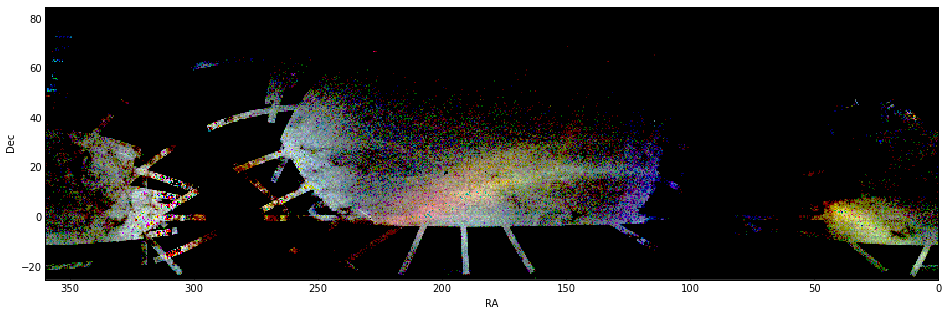

In [25]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.imshow(rgb,cmap=plt.cm.gray,extent=extent,interpolation='none',origin='upper')
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

In [11]:
plt.imsave('stream.png',rgb,cmap=plt.cm.gray)